#                    Group 5 - Final Report
Team: Evan Watson, Jake Plazony, Camryn Carty, Kenneth Gillum

##                          Analysis of the NFL Draft


####                     Data Collection and Extraction
The website of https://www.pro-football-reference.com/draft/ contains a section with detailed information about the NFL Draft picks from 1936 to 2019. The data is organized by year of the draft and then the data about the players is organized by the Round number and pick Number. 
Each draft pick contains information about their age, position, and playing statistics such as passing, rushing, and receiving. 


The URL https://www.pro-football-reference.com/years/2017/draft.htm is designed so the year can easily be changed and asked. In our parser in Assignment 2 we used the format:  url = 'https://www.pro-football-reference.com//years/'+str(year)+'/draft.htm'
This allowed us to download the data for different years easily. 

In order to find the data we wanted to collect, we used the BeautifulSoup Library. The main data we wanted was information about all the quarterbacks drafted as the first draft pick.  




### DATA ANALYSIS

#### ScatterPlot #1= Age vs. Total Average Passing Yards

For the first scatter plot, age vs. total average passing yards, we plotted the age on the x-axis and average passing yards on the y-axis. After getting the data using beautiful soup, we plotted each point for the past 9 years of NFL Drafts specifically the QB position. The scatterplot is in red as well as the linear regression line which is plotted below. From our findings with linear regression, we determined as the age of the QB increases their average total passing yards decreases and vice versa. So for example, a QB with an age of 26 has on average more passing yards than a QB with an age of 32. This is all again based on the last 9 years of draft data for QB's.


This is the code used to download and parse the first draft picks in the NFL for a given year. It then goes and finds the name, height, and age for that given quarterback. After finding all the information, it then finds the total average passing yards for that quarterback. 

Sleep for  1.223488016766245  seconds
#Download file : https://www.pro-football-reference.com//years/2015/draft.htm
['/players/H/HundBr00.htm', '/players/W/WinsJa00.htm', '/players/M/MariMa01.htm', '/players/S/SiemTr00.htm', '/players/G/GrayGa00.htm', '/players/P/PettBr01.htm', '/players/M/MannSe00.htm']
Sleep for  4.80590328285388  seconds
#Download file : https://www.pro-football-reference.com//years/2016/draft.htm
['/players/H/HogaKe00.htm', '/players/W/WentCa00.htm', '/players/H/HundBr00.htm', '/players/K/KessCo00.htm', '/players/D/DrisJe00.htm', '/players/P/PettBr01.htm', '/players/R/RudoJa00.htm', '/players/S/SiemTr00.htm', '/players/P/PresDa01.htm', '/players/L/LyncPa00.htm', '/players/H/HackCh01.htm', '/players/A/AlleBr00.htm', '/players/J/JoneCa01.htm', '/players/W/WinsJa00.htm', '/players/M/MariMa01.htm', '/players/B/BrisJa00.htm', '/players/G/GoffJa00.htm', '/players/D/DougBr00.htm', '/players/S/SudfNa00.htm', '/players/C/CookCo00.htm', '/players/G/GrayGa00.htm', '/players/M

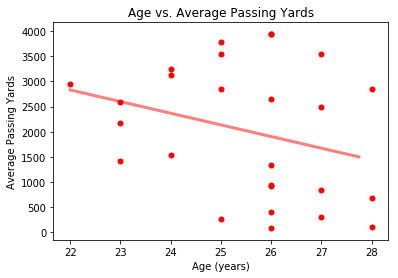

In [3]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from datetime import date

list_draft=[]
list_players = []
newlist=[]
QB=[]
begin_year, end_year = 2015, 2020

for year in range (begin_year, end_year, 1):
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    ##download
    url = 'https://www.pro-football-reference.com//years/'+str(year)+'/draft.htm'
    print ('#Download file :', url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
                #filehandle = urllib.request.urlopen(url)
                #html = filehandle.read()
  

    
    soup = BeautifulSoup(html, 'lxml')
    player = soup.find_all('td', attrs={'data-stat' : 'player'})
    draftPlayer = soup.find_all('td', attrs={'data-stat' : 'pos'})
    
    for i in draftPlayer:
        tt = format(str(i))
        aa= tt.split('>')
        list_draft.append(aa[1])
        
      
    for row in player:
        col = row.find_all('a')
        newy = format(str(col))
        newplayer= newy.split('"')
        x = newplayer
        #print(x[1])
        list_players.append((x[1]))
    merged_list = list(map(lambda x, y:(x,y), list_players, list_draft))
    #merged_list = tuple(zip(list_players, list_draft))  
    for i in merged_list:
        
        if "QB" in i[1]:
            newlist.append(i)
    for i in newlist:
        QB.append(i[0])
        QB = list(dict.fromkeys(QB))
        
    print(QB)
    
def download_and_parse_draft (player_url):
    ##download
    # Grabbing information from the nfl draft first picks 
    tmp = random.random()*3.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)
    url = 'https://www.pro-football-reference.com/'+str(player_url)
   
    #Displays what the link is
    print ('#Download link :', url)
   
    #Recommended using Mozilla/5.0 in class
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
   
    #Reads the HTML from the url we semt a request to
    html = urlopen(req).read()

    #save a player's HTML to disk.
    #create a text file for the individula player. Since we are updating the important information into data.txt, there is no
    #need to make an html file holder for every player
    f = open('player.html','w')
    f.write(html.decode('utf-8'))
    f.close()
 
    ####################### Begin parsing###############
    soup = BeautifulSoup(html, 'lxml')
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    player = name.get_text()
    
     #QB Height Parse
    heightList=[]
    secondHeightList=[]
    height = soup.find_all('span', attrs={'itemprop' : 'height'})
    heightSplit = format(str(height))
    newHeight= heightSplit.split('</span>')
    heightList.append(newHeight[0])
    for i in heightList:
        secondHeight = i.split(">")
    secondHeightList.append(secondHeight[1])
    heightDone = "".join(secondHeightList)
    print(heightDone)
    
    heightInchesLst = []
    heightInches = 0
    
    if len(heightDone) == 3:
        heightInches = (12 * int(heightDone[0])) + int(heightDone[2])
    elif len(heightDone) == 4:
        heightInches = (12 * int(heightDone[0])) + (10 + int(heightDone[3]))
    
    print(heightInches)

#     for i in heightInchesLst:
#         heightInches = 12
    #print(secondHeightList)
    
    #QB Name Parse
    nameList=[]
    secondNameList=[]
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    nameSplit = format(str(name))
    newName= nameSplit.split('</h1>')
    nameList.append(newName[0])
    for i in nameList:
        secondName = i.split(">")
    secondNameList.append(secondName[1])
    nameDone = "".join(secondNameList)
    print(nameDone)
   
    

    
    
    #QB Age Parse
    ageList=[]
    secondAgeList=[]
    age = soup.find('span', attrs={'itemprop' : 'birthDate'})
    ageSplit = format(str(age))
    newAge= ageSplit.split('data-birth="')
    ageList.append(newAge[1])
    for i in ageList:
        secondAge = i.split('" id')
    secondAgeList.append(secondAge[0])
    ageDone = "".join(secondAgeList)
    print(ageDone)
   
    passingYards = soup.find_all('td', attrs={'data-stat' : 'pass_yds'})
    
    count = 1
    
    ad = []
    numbers = {}
    
    for i in passingYards:
        newPY = format(str(i))
        spnewPY = newPY.split(">")
        for j in spnewPY:
            spJ = j.split("<")
            ad += spJ
        for j in ad:
            if j. isdigit():
                numbers[int(j)] = 0
    print(numbers)
    
    numbersMinusMax = {}
    
    for i in numbers:
        if numbers != {}:
            if i != max(numbers):
                if i != 0:
                    numbersMinusMax[i] = 0
    avg = findAverage(numbersMinusMax)
    print([avg, nameDone, heightInches, ageDone])

    return [avg, nameDone, heightInches, ageDone]


def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    print(avg)
    return avg

def average_value (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def std_deviation (x):
    av_x = average_value (x)
    if av_x != None:
        std = 0.0
        num = 0.0
        for i in range(0, len(x)):
            std += (float(x[i]) - av_x)*(float(x[i]) - av_x)
            num += 1.0
        return np.sqrt(std/num)
    return None


def second_moment (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])*float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def linear_regression (x, y):
    
    if (len(x) != len(y)):
        return None
    
    a_x =  average_value (x)
    a_y =  average_value (y)
    s_x =  std_deviation (x)
    s_y =  std_deviation (y)
    m_x =  second_moment (x)
    m_y =  second_moment (y)
    
    
    p = []
    for i in range(0, len(x)):
        p.append(float(x[i])*float(y[i]))
    a_p = average_value (p)
    
    ##linear correlation coefficient
    r = (a_p - a_x*a_y) / np.sqrt ( (m_x-a_x*a_x) * (m_y-a_y*a_y) )
    
    
    ##best fit
    beta = r * s_y / s_x
    alpha = a_y - beta * a_x
    
    
    return alpha, beta, r
                
#     totYards = 0
                
#     if numbers != []:
#         totYards += max(numbers)

#     return totYards

def buildHeightGraph(begin_year, end_year, QB, list_players, choice):
    
    y = []
    x = []
    newxANDy = []
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        print(match)
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]

        names = []
    else:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        print(days)
        
        x = []
        for i in days:
            x+=[i]
    
    
    area = np.pi*3
    
    colors = (0,0,0)
    
#     fig, ax = plt.subplots()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    if choice == 1:
        
        plt.plot(x,y, marker='o', color ='blue', markersize=5, linewidth=0)
        best_fit_x = np.arange(min(x), max(x), (max(x) - min(x)) / 10.0)
        best_fit_y = intercept + slope * best_fit_x
        plt.plot(best_fit_x, best_fit_y, color ='blue', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
    else:
        plt.plot(x,y, marker='o', color ='red', markersize=5, linewidth=0)
        best_fit_x = np.arange(min(x), max(x), .25)
        best_fit_y = intercept + slope * best_fit_x
        plt.plot(best_fit_x, best_fit_y, color ='red', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)
        
    plt.scatter(x, y, s=area, c=colors, alpha=0.5)
        
###########Give each point a label
#     for i, txt in enumerate(names):
#         ant = ax.annotate(txt, (x[i], y[i]))
#         ant = ant.set_visible(False)
    it = 0
#     if match.isEmpty()==False:
#         for i in match:
#             plt.annotate(match[i], # this is the text
#                          (labelx[it],labely[it]), # this is the point to label
#                          textcoords="offset points", # how to position the text
#                          xytext=(0,10), # distance from text to points (x,y)
#                          ha='left') # horizontal alignment can be left, right or center
#             it += 1
    if choice == 1:
        plt.title('Height to average yard thrown')
        plt.xlabel('Height')
        plt.ylabel('Average Yards')
    else:
        plt.title('Age vs. Average Passing Yards')
        plt.xlabel('Age (years)')
        plt.ylabel('Average Passing Yards')
    plt.show()
    
buildHeightGraph(begin_year, end_year, QB, list_players,0)

## Scatter Plot #2- Height vs. Total Average Passing Yards

For the second scatter plot, height vs. total average passing yards, we plotted the height on the x-axis and average passing yards on the y-axis. After getting the data using beautiful soup, we plotted each point for the past 9 years of NFL Drafts specifically the QB position. The scatterplot is in blue as well as the linear regression line which is plotted below. From our findings with linear regression, we determined as the height of the QB increases their average total passing yards decreases and vice versa. So for example, a QB with a height of 74 inches has on average more passing yards than a QB with a height of 78 inches. This is all again based on the last 9 years of draft data for QB's.

#Download file : https://www.pro-football-reference.com//years/2011/draft.htm
['/players/S/StanRi00.htm', '/players/Y/YateT.00.htm', '/players/L/LockJa00.htm', '/players/K/KaepCo00.htm', '/players/G/GabbBl00.htm', '/players/E/EndeNa00.htm', '/players/M/MallRy00.htm', '/players/P/PryoTe00.htm', '/players/D/DaltAn00.htm', '/players/N/NewtCa00.htm', '/players/M/McElGr00.htm', '/players/T/TaylTy00.htm', '/players/P/PondCh00.htm']
#Download file : https://www.pro-football-reference.com//years/2012/draft.htm
['/players/C/CousKi00.htm', '/players/F/FoleNi00.htm', '/players/L/LockJa00.htm', '/players/H/HarnCh00.htm', '/players/G/GabbBl00.htm', '/players/O/OsweBr00.htm', '/players/L/LindRy00.htm', '/players/M/MallRy00.htm', '/players/T/TannRy00.htm', '/players/S/StanRi00.htm', '/players/Y/YateT.00.htm', '/players/W/WeedBr00.htm', '/players/K/KaepCo00.htm', '/players/P/PryoTe00.htm', '/players/C/ColeB.00.htm', '/players/E/EndeNa00.htm', '/players/D/DaltAn00.htm', '/players/G/GrifRo01.htm', '/pla

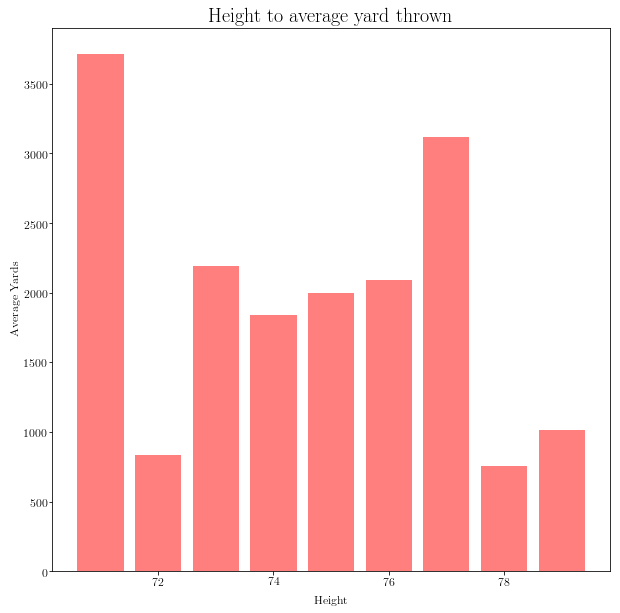

In [4]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

from datetime import date

list_draft=[]
list_players = []
newlist=[]
QB=[]
begin_year, end_year = 2011, 2020

for year in range (begin_year, end_year, 1):
    #tmp = random.random()*5.0
    #print ('Sleep for ', tmp, ' seconds')
    #time.sleep(tmp)

    ##download
    url = 'https://www.pro-football-reference.com//years/'+str(year)+'/draft.htm'
    print ('#Download file :', url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
                #filehandle = urllib.request.urlopen(url)
                #html = filehandle.read()
  

    
    soup = BeautifulSoup(html, 'lxml')
    player = soup.find_all('td', attrs={'data-stat' : 'player'})
    draftPlayer = soup.find_all('td', attrs={'data-stat' : 'pos'})
    
    for i in draftPlayer:
        tt = format(str(i))
        aa= tt.split('>')
        list_draft.append(aa[1])
        
      
    for row in player:
        col = row.find_all('a')
        newy = format(str(col))
        newplayer= newy.split('"')
        x = newplayer
        #print(x[1])
        list_players.append((x[1]))
    merged_list = list(map(lambda x, y:(x,y), list_players, list_draft))
    #merged_list = tuple(zip(list_players, list_draft))  
    for i in merged_list:
        
        if "QB" in i[1]:
            newlist.append(i)
    for i in newlist:
        QB.append(i[0])
        QB = list(dict.fromkeys(QB))
        
    print(QB)
    
            
def download_and_parse_draft (player_url):
    ##download
    # Grabbing information from the nfl draft first picks fir a given
    tmp = random.random()*3.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)
    url = 'https://www.pro-football-reference.com/'+str(player_url)
   
    #Displays what the link is
    print ('#Download link :', url)
   
    #Recommended using Mozilla/5.0 in class
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
   
    #Reads the HTML from the url we semt a request to
    html = urlopen(req).read()

    #save a player's HTML to disk. This was provided in class
    #create a text file for the individula player. Since we are updating the important information into data.txt, there is no
    #need to make an html file holder for every player
    f = open('player.html','w')
    f.write(html.decode('utf-8'))
    f.close()
 
    ####################### Begin parsing###############
    soup = BeautifulSoup(html, 'lxml')
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    player = name.get_text()
    
     #QB Height Parse
    heightList=[]
    secondHeightList=[]
    height = soup.find_all('span', attrs={'itemprop' : 'height'})
    heightSplit = format(str(height))
    newHeight= heightSplit.split('</span>')
    heightList.append(newHeight[0])
    for i in heightList:
        secondHeight = i.split(">")
    secondHeightList.append(secondHeight[1])
    heightDone = "".join(secondHeightList)
    print(heightDone)
    
    heightInchesLst = []
    heightInches = 0
    
    if len(heightDone) == 3:
        heightInches = (12 * int(heightDone[0])) + int(heightDone[2])
    elif len(heightDone) == 4:
        heightInches = (12 * int(heightDone[0])) + (10 + int(heightDone[3]))
    
    print(heightInches)

#     for i in heightInchesLst:
#         heightInches = 12
    #print(secondHeightList)
    
    #QB Name Parse
    nameList=[]
    secondNameList=[]
    name = soup.find('h1', attrs={'itemprop' : 'name'})
    nameSplit = format(str(name))
    newName= nameSplit.split('</h1>')
    nameList.append(newName[0])
    for i in nameList:
        secondName = i.split(">")
    secondNameList.append(secondName[1])
    nameDone = "".join(secondNameList)
    print(nameDone)
   
    

    
    
    #QB Age Parse
    ageList=[]
    secondAgeList=[]
    age = soup.find('span', attrs={'itemprop' : 'birthDate'})
    ageSplit = format(str(age))
    newAge= ageSplit.split('data-birth="')
    ageList.append(newAge[1])
    for i in ageList:
        secondAge = i.split('" id')
    secondAgeList.append(secondAge[0])
    ageDone = "".join(secondAgeList)
    print(ageDone)
   
    passingYards = soup.find_all('td', attrs={'data-stat' : 'pass_yds'})
    
    count = 1
    
    ad = []
    numbers = {}
    
    for i in passingYards:
        newPY = format(str(i))
        spnewPY = newPY.split(">")
        for j in spnewPY:
            spJ = j.split("<")
            ad += spJ
        for j in ad:
            if j. isdigit():
                numbers[int(j)] = 0
    print(numbers)
    
    numbersMinusMax = {}
    
    for i in numbers:
        if numbers != {}:
            if i != max(numbers):
                if i != 0:
                    numbersMinusMax[i] = 0
    avg = findAverage(numbersMinusMax)
    print([avg, nameDone, heightInches, ageDone])

    return [avg, nameDone, heightInches, ageDone]
    

def findAverage(dictionary):
    add = 0
    avg = 0
    for i in dictionary:
        add += i
        avg = add/len(dictionary)
    print(avg)
    return avg

def average_value (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


def std_deviation (x):
    av_x = average_value (x)
    if av_x != None:
        std = 0.0
        num = 0.0
        for i in range(0, len(x)):
            std += (float(x[i]) - av_x)*(float(x[i]) - av_x)
            num += 1.0
        return np.sqrt(std/num)
    return None


def second_moment (x):
    av = 0.0
    num = 0.0
    for i in range(0, len(x)):
        av += float(x[i])*float(x[i])
        num += 1.0
    if num > 0.0:
        return av/num
    return None


                
#     totYards = 0
                
#     if numbers != []:
#         totYards += max(numbers)

#     return totYards

def buildHeightGraph(begin_year, end_year, QB, list_players, choice):
    
    y = []
    x = []
    newxANDy = []
    
    labelx = []
    labely =[]
    if choice == 1:
        labels = []

        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[2]]
                xANDy += [[hold[2],hold[0]]]
                
        mini = xANDy[0][0]
        tempxANDy = xANDy
        ttxANDy = []

        #order the height of the players so it will show up in ascending order for the graph#
        #####################################################################################
        while len(newxANDy) != len(xANDy):
            for i in range(len(tempxANDy)):
                if tempxANDy[i][0] < mini:
                        mini = tempxANDy[i][0]
            for i in range(len(tempxANDy)):
                if mini == tempxANDy[i][0]:
                    newxANDy += [tempxANDy[i]]
                else:
                    ttxANDy += [tempxANDy[i]]
            tempxANDy = ttxANDy
            ttxANDy = []
            # if len(tempxANDy) 
            mini = 1000000000000
            
            count = 0
            
        match = {}
        seen = []
        matchPair =[]
        for i in range(len(x)):
            for j in range(len(x)):
                if x[i] == x[j] and i != j and j not in seen:
                    if y[i] == y[j]:
                        if str(x[i]) + "," + str(y[i]) in match:
                            match[str(x[i]) + "," + str(y[i])] += 1
                            seen += [j]
                        else:
                            match[str(x[i]) + "," + str(y[i])] = 0
        print(match)
        
        for i in match:
            h = i.split(",")
            labelx += [float(h[0])]
            labely += [float(h[1])]
            
        y = []
        x = []
        for i in newxANDy:
            x += [i[0]]
            y += [i[1]]

        names = []
    else:
        xANDy = []
        hold = 0
        for player in range(len(QB)):
            hold = download_and_parse_draft(QB[player])
            if hold[0] != 0:
                y += [hold[0]]
                x += [hold[3]]
                xANDy += [[hold[3],hold[0]]]

        days = []
        for i in x:
            d = i.split("-")
            f_date = date(int(d[0]), int(d[1]), int(d[2]))
            delta = date.today() - f_date
            da = delta/365.0
            dl = da.days
            days+=[dl]
        print(days)
        
        x = []
        for i in days:
            x+=[i]
    
    
    area = np.pi*3
    noDup = list(set(x))
    colors = (0,0,0)
    
    
    mainList = []
    xyList = [(x[i], y[i]) for i in range(0, len(x))]
    print(xyList)
    mainList = []
    print(xyList)
    sumHeight=0
    count=0
    sumDict={}
    for i in noDup:
        sumTemp = 0
        count = 0
        for a in xyList:
            print(a[1])
            if i ==a[0]:
                sumTemp += a[1]
                count += 1
        sumDict[i] = sumTemp/count
    print(sumDict)
    
    
    xAxis=[]
    yAxis=[]
    for x in sumDict:
        xAxis.append(x)
        print(x)
    print(xAxis)

    for a in sumDict.values():
        yAxis.append(a)
        print(a)
    print(yAxis)

    
                
        
#     fig, ax = plt.subplots()
   
#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####

#####################################

###########Give each point a label
#     for i, txt in enumerate(names):
#         ant = ax.annotate(txt, (x[i], y[i]))
#         ant = ant.set_visible(False)


            
    plt.figure(figsize=(10,10))
    plt.rc('text', usetex=True)
    plt.rc('font', size=12, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
    plt.rcParams['xtick.major.pad'] = 1
    plt.rcParams['ytick.major.pad'] = 1


    title = 'Height to average yard thrown'
    plt.title(title, fontsize = 20)

    plt.bar(xAxis, yAxis, color = 'red', align='center', alpha=0.5, label = 'visitors')
    plt.xlabel('Height', size=12)
    plt.ylabel('Average Yards', size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)

    plt.show()

      
buildHeightGraph(begin_year, end_year, QB, list_players,1)

# Conclusion

